<a href="https://colab.research.google.com/github/shreya139/Circuits-in-Stocks/blob/202218061-JATAN/lstm_nifty_closing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Stock Market Prediction And Forecasting Using Stacked LSTM

In [ ]:
### Keras and Tensorflow >2.0

In [ ]:
### Data Collection
import pandas_datareader as pdr
key=""

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gc
# from talib import RSI, BBANDS, MACD, EMA, STOCH, ADX
# from nsepy import get_history
from datetime import date
import yfinance as yf

In [ ]:
import yfinance as yf
yf.pdr_override()
from pandas_datareader import data as pdr

In [ ]:
yf.pdr_override() # <== that's all it takes :-)


#this is reference start date before EMA 200 days will fetch null
ref_startdate = date(2008,1,1)

#actual start date and end date from where the Nifty model to be built
startdate = date(2009,1,1)
enddate = date(2022,12,31)

# download dataframe
df = pdr.get_data_yahoo("^NSEI", start=startdate, end=enddate,interval='1d')
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3034.600098,3079.850098,3021.800049,3046.750000,3046.750000,0
2009-01-05,3058.750000,3131.949951,3056.449951,3121.449951,3121.449951,0
2009-01-06,3121.500000,3141.800049,3056.100098,3112.800049,3112.800049,0
2009-01-07,3112.800049,3147.199951,2888.199951,2920.399902,2920.399902,0
2009-01-09,2919.949951,2929.850098,2810.250000,2873.000000,2873.000000,0
...,...,...,...,...,...,...
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900


In [ ]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3034.600098,3079.850098,3021.800049,3046.750000,3046.750000,0
2009-01-05,3058.750000,3131.949951,3056.449951,3121.449951,3121.449951,0
2009-01-06,3121.500000,3141.800049,3056.100098,3112.800049,3112.800049,0
2009-01-07,3112.800049,3147.199951,2888.199951,2920.399902,2920.399902,0
2009-01-09,2919.949951,2929.850098,2810.250000,2873.000000,2873.000000,0


In [ ]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-12-26,17830.400391,18084.099609,17774.250000,18014.599609,18014.599609,176700
2022-12-27,18089.800781,18149.250000,17967.449219,18132.300781,18132.300781,214300
2022-12-28,18084.750000,18173.099609,18068.349609,18122.500000,18122.500000,193900
2022-12-29,18045.699219,18229.699219,17992.800781,18191.000000,18191.000000,281100
2022-12-30,18259.099609,18265.250000,18080.300781,18105.300781,18105.300781,192000


In [ ]:
df1=df.reset_index()['Close']

In [ ]:
df1

0        3046.750000
1        3121.449951
2        3112.800049
3        2920.399902
4        2873.000000
            ...     
3425    18014.599609
3426    18132.300781
3427    18122.500000
3428    18191.000000
3429    18105.300781
Name: Close, Length: 3430, dtype: float64

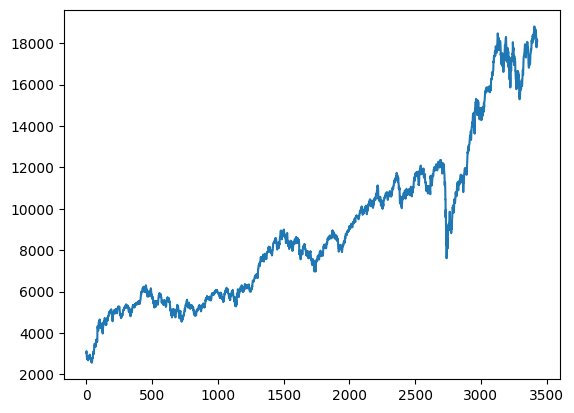

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [ ]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [ ]:
df1

0        3046.750000
1        3121.449951
2        3112.800049
3        2920.399902
4        2873.000000
            ...     
3425    18014.599609
3426    18132.300781
3427    18122.500000
3428    18191.000000
3429    18105.300781
Name: Close, Length: 3430, dtype: float64

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [ ]:
print(df1)

[[0.02916373]
 [0.03376367]
 [0.03323102]
 ...
 [0.95751061]
 [0.96172876]
 [0.95645151]]


In [ ]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [ ]:
training_size,test_size

(2229, 1201)

In [ ]:
train_data

array([[0.02916373],
       [0.03376367],
       [0.03323102],
       ...,
       [0.49057383],
       [0.48818151],
       [0.4909279 ]])

In [ ]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [ ]:
# reshape into X=t,t+1,t+2,t+3,t+4------t+99 and Y=t+100
# In 1st row it contains 99 days closing price and in the target 100th day price
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(2128, 100)
(2128,)


(None, None)

In [ ]:
print(X_test.shape), print(ytest.shape)

(1100, 100)
(1100,)


(None, None)

In [ ]:
X_train

array([[0.02916373, 0.03376367, 0.03323102, ..., 0.12054364, 0.12312685,
        0.12400435],
       [0.03376367, 0.03323102, 0.02138324, ..., 0.12312685, 0.12400435,
        0.11433647],
       [0.03323102, 0.02138324, 0.01846441, ..., 0.12400435, 0.11433647,
        0.12179061],
       ...,
       [0.46259551, 0.46676435, 0.4664226 , ..., 0.4880183 , 0.48669129,
        0.49285838],
       [0.46676435, 0.4664226 , 0.46602853, ..., 0.48669129, 0.49285838,
        0.48535195],
       [0.4664226 , 0.46602853, 0.46484314, ..., 0.49285838, 0.48535195,
        0.49057383]])

In [ ]:
y_train

array([0.11433647, 0.12179061, 0.12821327, ..., 0.48535195, 0.49057383,
       0.48818151])

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
34/34 [==============================] - 17s 303ms/step - loss: 0.0147 - val_loss: 0.0341
Epoch 2/100
34/34 [==============================] - 7s 200ms/step - loss: 4.7340e-04 - val_loss: 0.0015
Epoch 3/100
34/34 [==============================] - 8s 235ms/step - loss: 1.6580e-04 - val_loss: 0.0028
Epoch 4/100
34/34 [==============================] - 7s 200ms/step - loss: 1.5731e-04 - val_loss: 0.0025
Epoch 5/100
34/34 [==============================] - 8s 244ms/step - loss: 1.5953e-04 - val_loss: 0.0022
Epoch 6/100
34/34 [==============================] - 9s 258ms/step - loss: 1.5578e-04 - val_loss: 0.0020
Epoch 7/100
34/34 [==============================] - 7s 199ms/step - loss: 1.5157e-04 - val_loss: 0.0015
Epoch 8/100
34/34 [==============================] - 8s 236ms/step - loss: 1.5567e-04 - val_loss: 0.0015
Epoch 9/100
34/34 [==============================] - 7s 199ms/step - loss: 1.5579e-04 - val_loss: 0.0012
Epoch 10/100
34/34 [==============================] - 9s 2

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.13.0'

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

35/35 [==============================] - 1s 38ms/step


In [ ]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [ ]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

7027.561575884286

In [ ]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

13904.071697972573

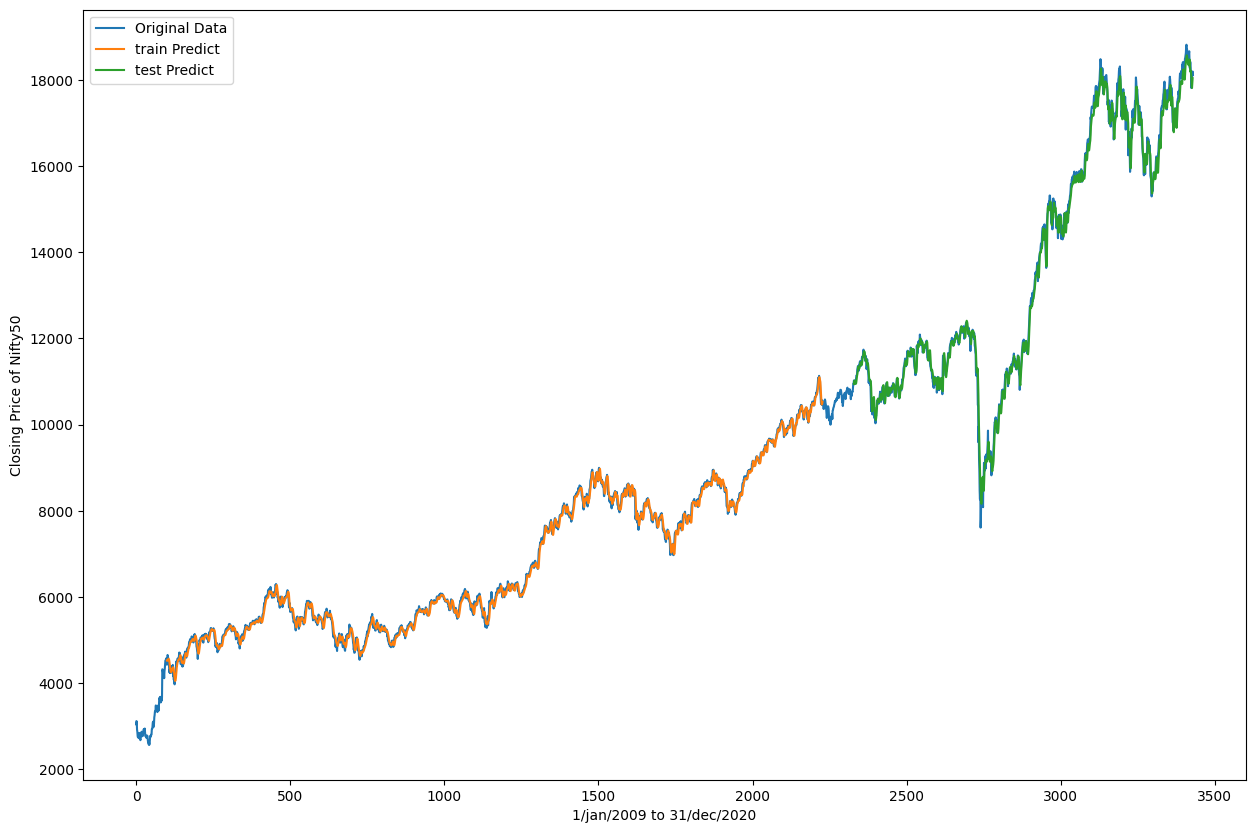

In [ ]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(15, 10))
plt.plot(scaler.inverse_transform(df1), label='Original Data')
plt.plot(trainPredictPlot,label='train Predict')
plt.plot(testPredictPlot,label='test Predict')
# Add a legend to the plot
# Add labels
plt.xlabel("1/jan/2009 to 31/dec/2020")
plt.ylabel("Closing Price of Nifty50")
plt.legend()
plt.show()

In [ ]:
len(test_data)

1201

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 860)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.8583551465000423,
 0.8866418981676942,
 0.8743139407244789,
 0.8843198513890065,
 0.8783669678290975,
 0.8986321033521913,
 0.925821160179009,
 0.9287764924427933,
 0.9567677108840666,
 0.9386979650426415,
 0.933040614709111,
 0.9495060373216249,
 0.9642404796082076,
 0.9551211686228154,
 0.9598919192772104,
 0.9663514312251966,
 0.9624672802499368,
 0.9229502659799038,
 0.9598497002448705,
 0.9879253567508233,
 0.985941062230854,
 0.9253145317909315,
 0.9217259140420504,
 0.964747107996285,
 0.9757240564046274,
 0.9915984125643842,
 0.9697289538123788,
 0.9761462467280253,
 0.9679557544541082,
 1.0000000000000002,
 0.9901629654648318,
 0.9905007177235499,
 0.9653803934813816,
 0.9848855864223593,
 0.9708688676855528,
 0.9402600692392133,
 0.8774803681499621,
 0.8348391454867856,
 0.8541332432660644,
 0.7733682344000676,
 0.7726927298826314,
 0.8801401671873683,
 0.8400743054969182,
 0.8967322468969012,
 0.8552731571392387,
 0.8388499535590646,
 0.7423372456303303,
 0.82327113062568

In [ ]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.94413203]
101
1 day input [0.8866419  0.87431394 0.88431985 0.87836697 0.8986321  0.92582116
 0.92877649 0.95676771 0.93869797 0.93304061 0.94950604 0.96424048
 0.95512117 0.95989192 0.96635143 0.96246728 0.92295027 0.9598497
 0.98792536 0.98594106 0.92531453 0.92172591 0.96474711 0.97572406
 0.99159841 0.96972895 0.97614625 0.96795575 1.         0.99016297
 0.99050072 0.96538039 0.98488559 0.97086887 0.94026007 0.87748037
 0.83483915 0.85413324 0.77336823 0.77269273 0.88014017 0.84007431
 0.89673225 0.85527316 0.83884995 0.74233725 0.82327113 0.78143207
 0.6665963  0.7921557  0.64118044 0.68614371 0.66001013 0.65203074
 0.58642236 0.56586169 0.66089673 0.65515494 0.70970193 0.66452757
 0.69437642 0.69218104 0.63569197 0.65266402 0.63780292 0.7267162
 0.71388162 0.74191506 0.75002111 0.77222832 0.83049059 0.8194292
 0.8289707  0.8125475  0.78776492 0.75162543 0.78426074 0.77974331
 0.81326522 0.8141096  0.79473106 0.83336148 0.85898843 0.83901883
 0.85628641 0.87486279 0.88782403 0.

10 day output [[0.9050924]]
11 day input [0.94950604 0.96424048 0.95512117 0.95989192 0.96635143 0.96246728
 0.92295027 0.9598497  0.98792536 0.98594106 0.92531453 0.92172591
 0.96474711 0.97572406 0.99159841 0.96972895 0.97614625 0.96795575
 1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.9406400

20 day output [[0.90279734]]
21 day input [0.92531453 0.92172591 0.96474711 0.97572406 0.99159841 0.96972895
 0.97614625 0.96795575 1.         0.99016297 0.99050072 0.96538039
 0.98488559 0.97086887 0.94026007 0.87748037 0.83483915 0.85413324
 0.77336823 0.77269273 0.88014017 0.84007431 0.89673225 0.85527316
 0.83884995 0.74233725 0.82327113 0.78143207 0.6665963  0.7921557
 0.64118044 0.68614371 0.66001013 0.65203074 0.58642236 0.56586169
 0.66089673 0.65515494 0.70970193 0.66452757 0.69437642 0.69218104
 0.63569197 0.65266402 0.63780292 0.7267162  0.71388162 0.74191506
 0.75002111 0.77222832 0.83049059 0.8194292  0.8289707  0.8125475
 0.78776492 0.75162543 0.78426074 0.77974331 0.81326522 0.8141096
 0.79473106 0.83336148 0.85898843 0.83901883 0.85628641 0.87486279
 0.88782403 0.90095415 0.92793211 0.948535   0.93333615 0.91746179
 0.92544119 0.91771511 0.9483239  0.94064004 0.96635143 0.9563033
 0.96491598 0.94413203 0.93795931 0.92865342 0.91987926 0.91280973
 0.90777564 0.90473258 0

28 day output [[0.903272]]
29 day input [1.         0.99016297 0.99050072 0.96538039 0.98488559 0.97086887
 0.94026007 0.87748037 0.83483915 0.85413324 0.77336823 0.77269273
 0.88014017 0.84007431 0.89673225 0.85527316 0.83884995 0.74233725
 0.82327113 0.78143207 0.6665963  0.7921557  0.64118044 0.68614371
 0.66001013 0.65203074 0.58642236 0.56586169 0.66089673 0.65515494
 0.70970193 0.66452757 0.69437642 0.69218104 0.63569197 0.65266402
 0.63780292 0.7267162  0.71388162 0.74191506 0.75002111 0.77222832
 0.83049059 0.8194292  0.8289707  0.8125475  0.78776492 0.75162543
 0.78426074 0.77974331 0.81326522 0.8141096  0.79473106 0.83336148
 0.85898843 0.83901883 0.85628641 0.87486279 0.88782403 0.90095415
 0.92793211 0.948535   0.93333615 0.91746179 0.92544119 0.91771511
 0.9483239  0.94064004 0.96635143 0.9563033  0.96491598 0.94413203
 0.93795931 0.92865342 0.91987926 0.91280973 0.90777564 0.90473258
 0.90339231 0.90332204 0.90403908 0.90509242 0.90611798 0.90686554
 0.90720606 0.90711629

In [ ]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
len(df1)

1258

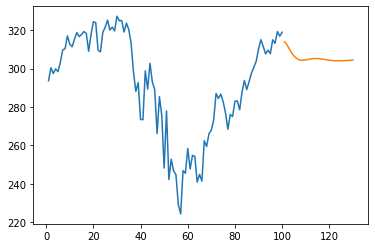

In [ ]:
plt.plot(day_new,scaler.inverse_transform(df1[1158:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

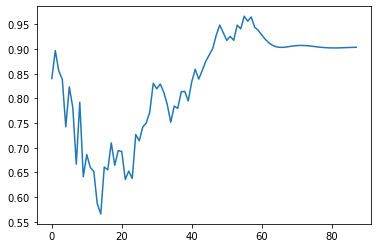

In [ ]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [ ]:
df3=scaler.inverse_transform(df3).tolist()

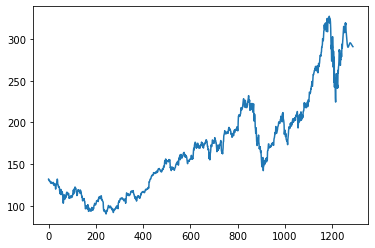

In [ ]:
plt.plot(df3)